**EIE558 Lab 1: DNN-based Speech Enhancement**

*Introduction*

This lab exercise uses Deep Complex U-Net (DCUnet) for speech enhancement. The algorithm and code are based on the paper "Phase-Aware Speech Enhancement with Deep Complex U-Net" by H.S. Choi et al. (2019). The codes have been modified so that the network can use 16kHz wave files for both training and test (It is overkill to sample speech signal at 48kHz because the human speech production system cannot produce sounds beyond 8kHz). The architecture of the DCUnet is shown in the digram below. The numbers above the boxes are the size of the 4-dim tensors:  [no. channels x no. freq bins x no. of frames x 2], where the last entry contains real and img of individual frequencies. The blue and green arrows represent down- and up-sampling, respectively. The up and down sampling involve Conv2D followed by batch normalization.

The following procedure will create a folder "Learning/EIE558/DCUnet16" under your Google Drive. You may need to re-run some of the steps if the connection to Colab has expired. For the steps that download data and programs, you do not need to re-run them because the data and programs are stored on your Google Drive. 

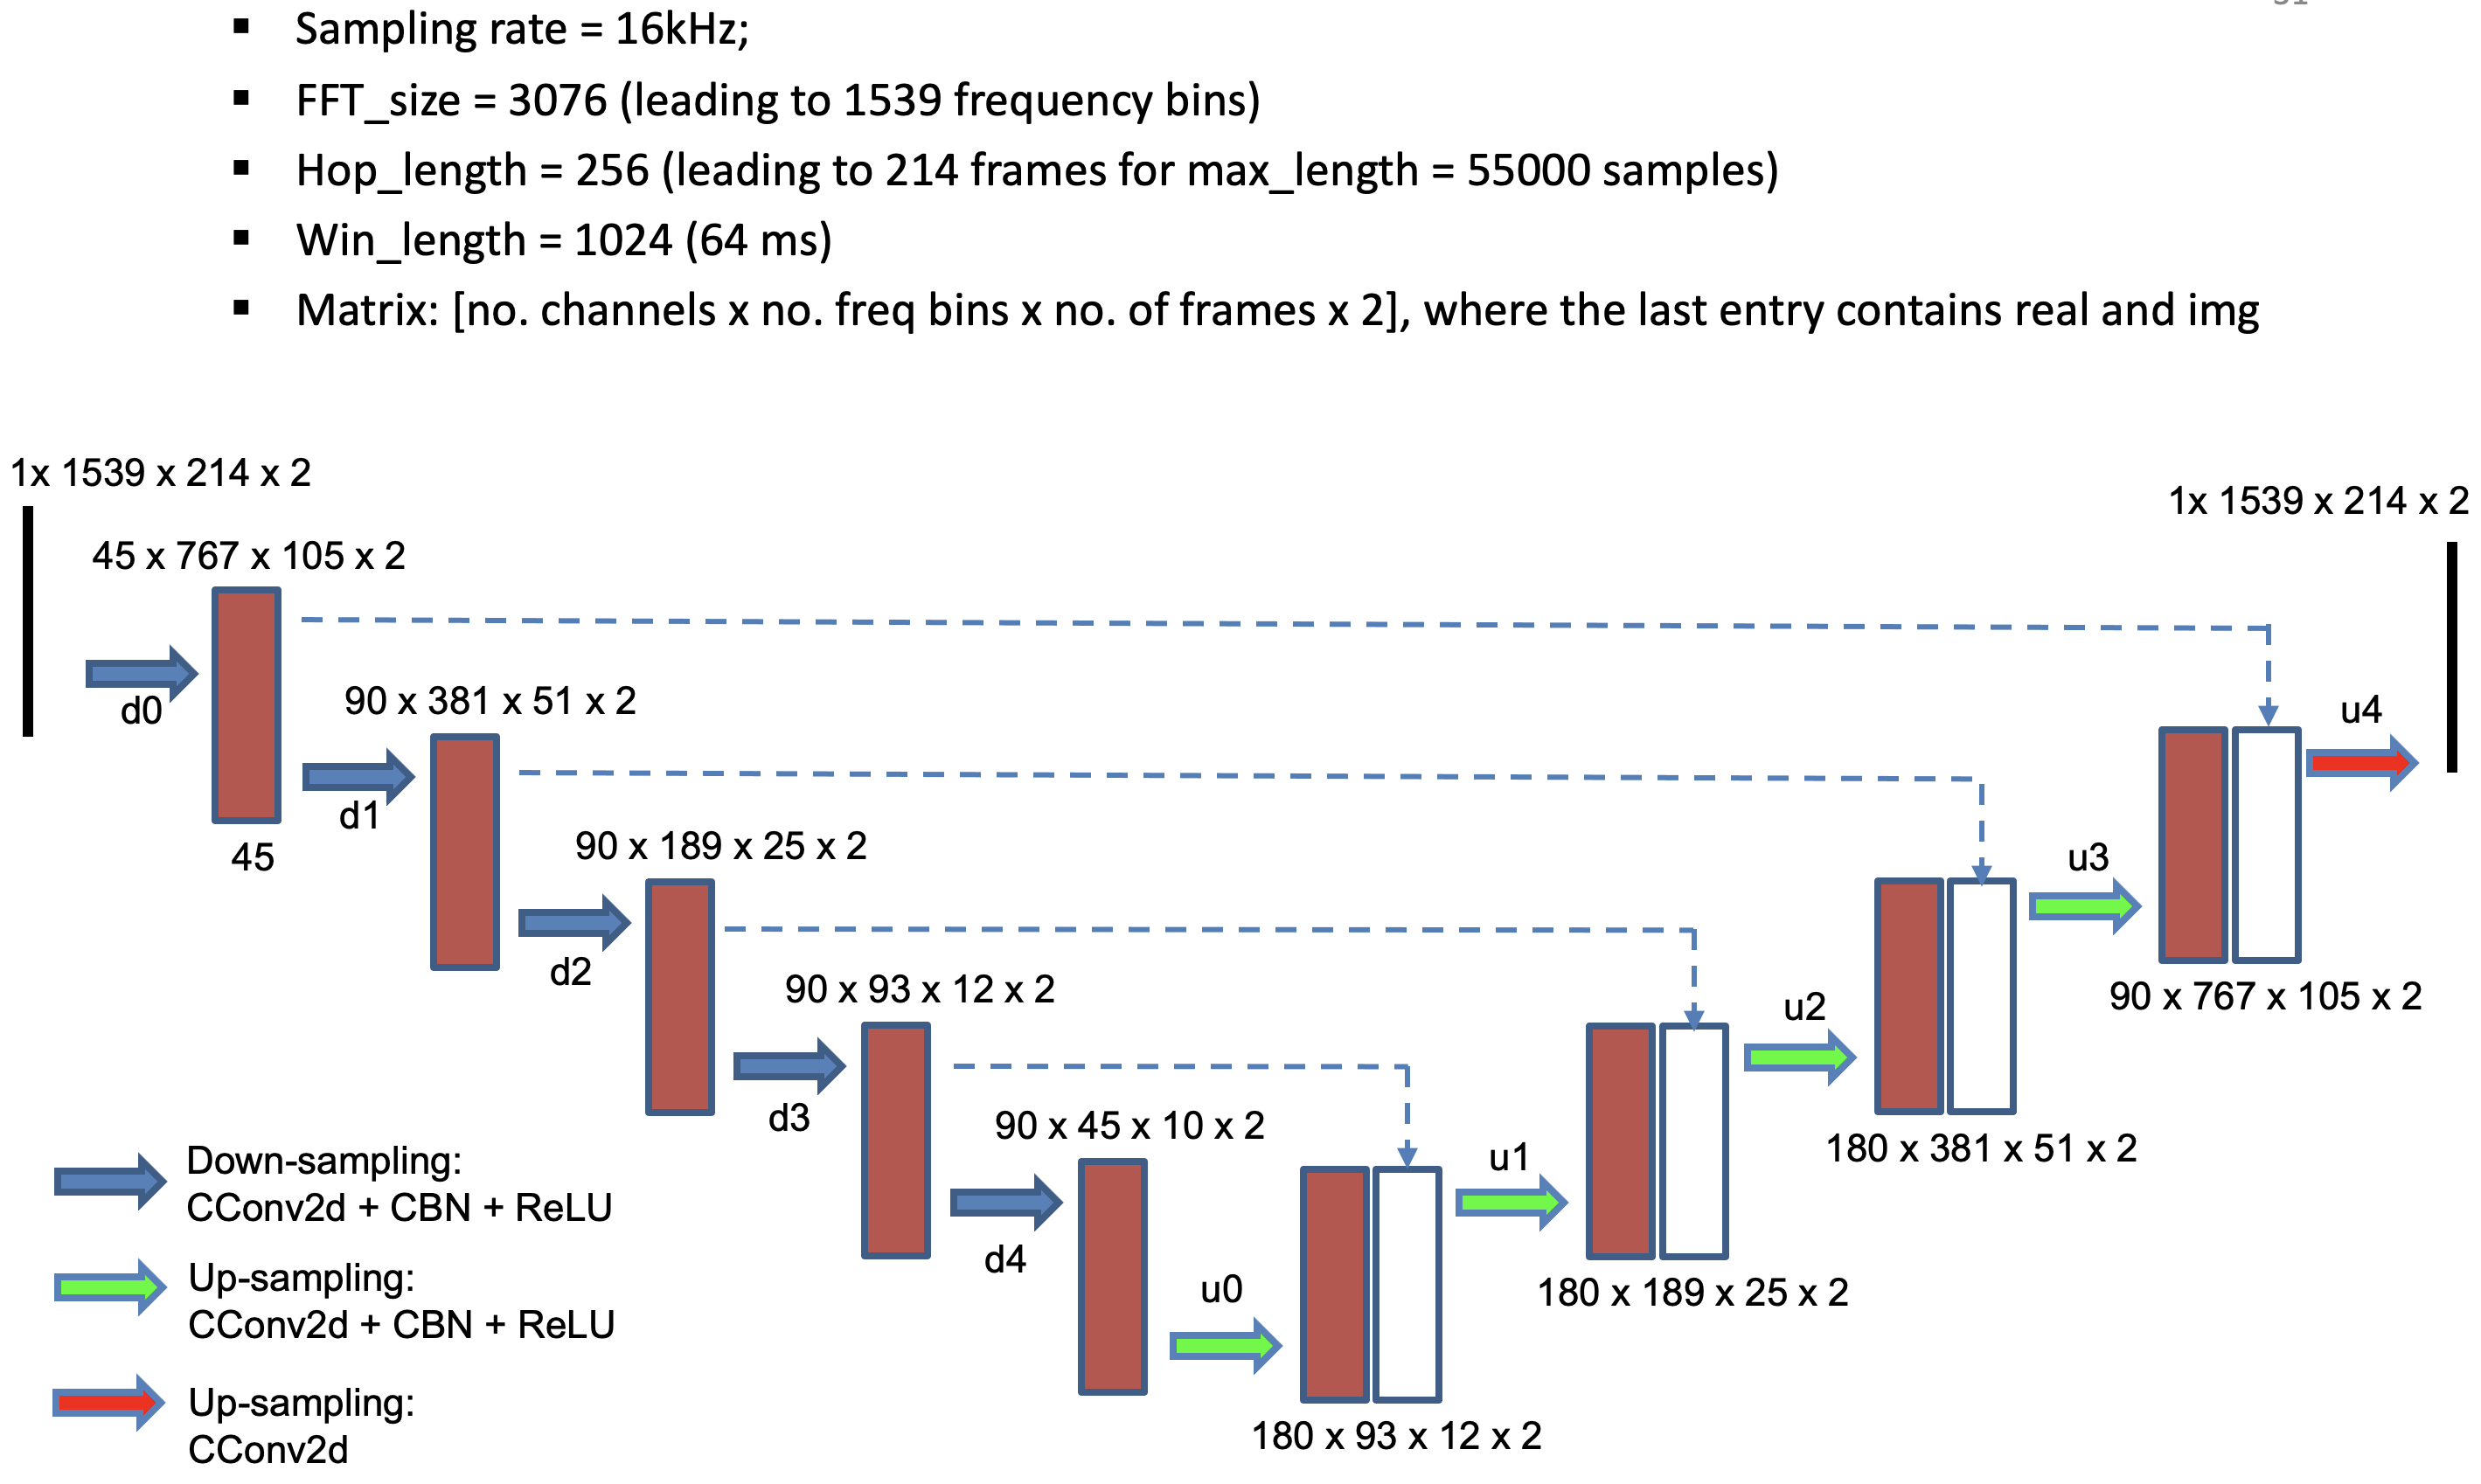

*Step 1: Mount Google Drive*

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


*Step 2: Create working directory and download DCUnet programs and model files*

In [ ]:
!mkdir -p /content/drive/MyDrive/Learning/EIE558
%cd /content/drive/MyDrive/Learning/EIE558
!if [ ! -f DCUnet16.tgz ]; then wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/DCUnet16.tgz; fi
!tar zxf DCUnet16.tgz
!rm -f *.tgz*

/content/drive/MyDrive/Learning/EIE558
--2021-02-22 12:26:03--  http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/DCUnet16.tgz
Resolving bioinfo.eie.polyu.edu.hk (bioinfo.eie.polyu.edu.hk)... 158.132.151.227
Connecting to bioinfo.eie.polyu.edu.hk (bioinfo.eie.polyu.edu.hk)|158.132.151.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10690275 (10M)
Saving to: ‘DCUnet16.tgz’

DCUnet16.tgz        100%[===================>]  10.19M  2.77MB/s    in 6.4s    

2021-02-22 12:26:10 (1.58 MB/s) - ‘DCUnet16.tgz’ saved [10690275/10690275]



In [2]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet16
!ls

/content/drive/MyDrive/Learning/EIE558/DCUnet16
audio	    model.py	 readme		   SpeechDataset.py
data	    models	 requirements.txt  stft-istft-example.py
dc-unet.py  __pycache__  scripts


*Step 3: Create data/ directory and download training and test data*

In [ ]:
%%shell
dir="data" 
if [ ! -d $dir ]; then
  echo "Directory $dir does not exist. Downloading ${dir}.zip"
  wget http://bioinfo.eie.polyu.edu.hk/download/EIE558/DCUnet/${dir}.zip;
  unzip -o ${dir}.zip;
  rm -f ${dir}.zip*;
else
  echo "Directory $dir already exist"
fi

Directory data already exist


In [ ]:
!du -s -h ./*

413K	./audio
2.2G	./data
9.0K	./dc-unet.py
9.5K	./model.py
11M	./models
22K	./__pycache__
512	./readme
512	./requirements.txt
5.0K	./scripts
2.5K	./SpeechDataset.py
1.5K	./stft-istft-example.py


In [ ]:
!ls data

clean_testset_wav	  noisy_testset_wav
clean_trainset_28spk_wav  noisy_trainset_28spk_wav


*Step 4: Install the version of Pytorch, Torchaudio and PESQ packages that work with the DCUnet code.*

In [5]:
!pip3 install torch==1.5.1 torchaudio==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 3.2MB 7.2MB/s 
ERROR: torchvision 0.8.2+cu101 has requirement torch==1.7.1, but you'll have torch 1.5.1+cu101 which is incompatible.
ERROR: torchaudio 0.5.0 has requirement torch==1.5.0, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101


In [6]:
!pip install pesq

  Created wheel for pesq: filename=pesq-0.0.2-cp37-cp37m-linux_x86_64.whl size=160892 sha256=af918c2a972fe8177c3abf09c00d6de6479328730aa4a65c95660553851e6bbb
  Stored in directory: /root/.cache/pip/wheels/95/96/02/64c5b0ffb69c5651438f511679983a6ed3ef23873d2e9ecde4
Successfully built pesq


*Step 5: Train a DCUnet and save it to the directory model/. It will take several hours. Skip this step if you want to use the default model in model/.*

In [12]:
%cd /content/drive/MyDrive/Learning/EIE558/DCUnet16
!python3 dc-unet.py train

/content/drive/MyDrive/Learning/EIE558/DCUnet16
Training mode
  0% 0/3 [00:00<?, ?it/s]Loss before training:0.610082
Processed 500 mini-batch: loss=-0.864
Processed 1000 mini-batch: loss=-0.890
Processed 1500 mini-batch: loss=-0.901
Processed 2000 mini-batch: loss=-0.908
Processed 2500 mini-batch: loss=-0.914
Processed 3000 mini-batch: loss=-0.918
Processed 3500 mini-batch: loss=-0.921
Processed 4000 mini-batch: loss=-0.923
Processed 4500 mini-batch: loss=-0.925
Processed 5000 mini-batch: loss=-0.927
Processed 5500 mini-batch: loss=-0.928
Epoch: 1/3... Loss: -0.929333... Test Loss: -0.977987
 33% 1/3 [2:20:00<4:40:00, 8400.15s/it]Processed 500 mini-batch: loss=-0.943
Processed 1000 mini-batch: loss=-0.946
Processed 1500 mini-batch: loss=-0.948
Processed 2000 mini-batch: loss=-0.948
Processed 2500 mini-batch: loss=-0.948
Processed 3000 mini-batch: loss=-0.948
Processed 3500 mini-batch: loss=-0.948
Processed 4000 mini-batch: loss=-0.948
Processed 4500 mini-batch: loss=-0.948
Processed 50

*Step 6: Test the DCUnet. Modify the file "dc-unet.py" on your Google drive folder "Learning/EIE558/DCUnet16/" so that it print out your name in this step. This is to demonstrate that the work is done by you.*

In [19]:
!python3 dc-unet.py test

Test mode
PESQ = 1.6380703151226044 (M.W. Mak)
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>
<Figure size 640x480 with 1 Axes>


*Step 7: Display and play the clean, noisy, and denoised wavefiles. Add your name to the display. Capture the screens (with your name) and put them into your report*

Clean speech (M.W. Mak)


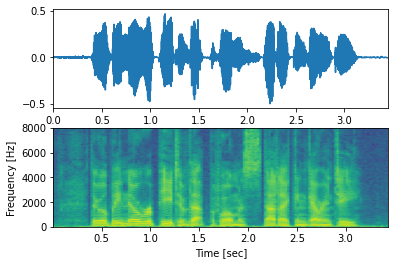

In [15]:
# Clean speech
from IPython.display import Audio
import soundfile as sf
clean_speech, srate = sf.read('audio/eval/clean/rec1.wav')
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(nrows=2)
time = np.arange(clean_speech.shape[0])/srate
ax1.plot(time, clean_speech)
ax1.set_xlim([0, time[-1]])
ax2.specgram(clean_speech, NFFT=512, Fs=srate, noverlap=128)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print('Clean speech (M.W. Mak)')
Audio(clean_speech, rate=srate)

Noisy speech (M.W. Mak)


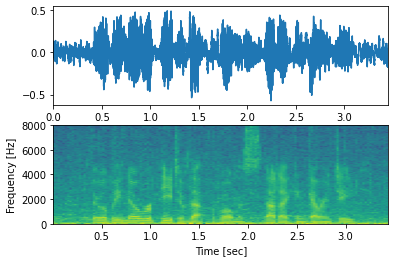

In [13]:
# Noisy speech
from IPython.display import Audio
import soundfile as sf
noisy_speech, srate = sf.read('audio/eval/noisy/rec1.wav')
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(nrows=2)
time = np.arange(noisy_speech.shape[0])/srate
ax1.plot(time, noisy_speech)
ax1.set_xlim([0, time[-1]])
ax2.specgram(noisy_speech, NFFT=512, Fs=srate, noverlap=128)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print('Noisy speech (M.W. Mak)')
Audio(noisy_speech, rate=srate) 

Denoised speech (M.W. Mak)


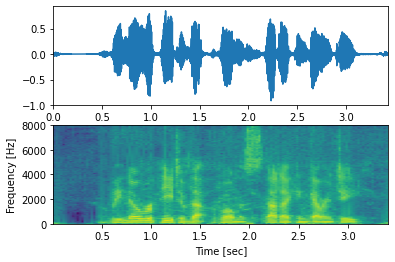

In [18]:
# Denoised speech
from IPython.display import Audio
import soundfile as sf
denoised_speech, srate = sf.read('audio/dc-unet-denoised.wav')
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(nrows=2)
time = np.arange(denoised_speech.shape[0])/srate
ax1.plot(time, denoised_speech)
ax1.set_xlim([0, time[-1]])
ax2.specgram(denoised_speech, NFFT=512, Fs=srate, noverlap=128)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
print('Denoised speech (M.W. Mak)')
Audio(denoised_speech, rate=srate) 

*Step 8: Repeat Steps 5-7 using the program dc-net.py. This program implements a network that does not have any skipped connections between the encoder and the decoder. That's why the letter "u" in the program name is removed.*